#### Ridge Regression Loss (Basic Form)

$$
\sum_{i=1}^{n} (y_i - \hat{y}_i)^2
\;+\;
\lambda \|w\|^2
$$

---

#### Explanation

The loss consists of two parts:
 **Squared Error Term**

$$
\sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

Measures how well the model fits the data.

**L2 Regularization Term**

$$
\lambda \|w\|^2
$$

Penalizes large weights.

Since:

$$
\|w\|^2 = w^T w
$$

The loss can also be written as:

$$
\sum_{i=1}^{n} (y_i - \hat{y}_i)^2
+
\lambda w^T w
$$

## 1) How the coeffiecnts get affected ??

| λ Value      | Coefficient Behavior      |
| ------------ | ------------------------- |
| λ = 0        | Same as Linear Regression |
| Small λ      | Slight shrinkage          |
| Medium λ     | Noticeable shrinkage      |
| Large λ      | Strong shrinkage          |
| Very Large λ | All weights ≈ 0           |


| λ Value  | Effect on ( w_0 ) | Effect on ( w_1 , w_2....... w_n ) |
| -------- | ----------------- | --------------------------- |
| λ = 0    | Normal            | Normal (OLS solution)       |
| Small λ  | No change         | Slight shrinkage            |
| Medium λ | No change         | Noticeable shrinkage        |
| Large λ  | No change         | Strong shrinkage            |
| λ → ∞    | No change         | All → 0                     |


In [1]:
from sklearn.datasets import load_diabetes

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
data = load_diabetes()

In [3]:
df = pd.DataFrame(data.data,columns=data.feature_names)
df['TARGET'] = data.target

In [4]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,TARGET
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data.data,data.target,test_size=0.2,random_state=42)

In [6]:

from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

In [7]:
coefs = []
r2_scores = []

for i in [0,10,100,1000]:
    reg = Ridge(alpha=i)
    reg.fit(X_train,y_train)
    
    coefs.append(reg.coef_.tolist())
    y_pred = reg.predict(X_test)
    r2_scores.append(r2_score(y_test,y_pred))

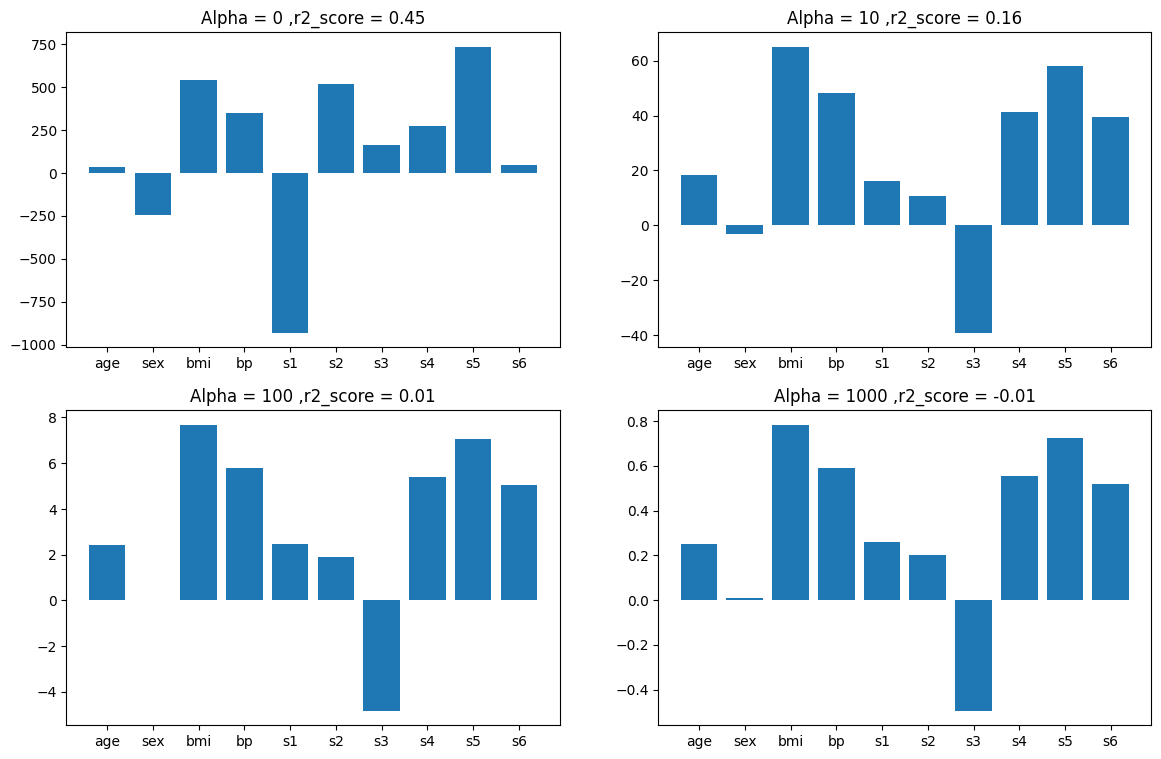

In [8]:
plt.figure(figsize=(14,9))
plt.subplot(221)
plt.bar(data.feature_names,coefs[0])
plt.title('Alpha = 0 ,r2_score = {}'.format(round(r2_scores[0],2)))

plt.subplot(222)
plt.bar(data.feature_names,coefs[1])
plt.title('Alpha = 10 ,r2_score = {}'.format(round(r2_scores[1],2)))

plt.subplot(223)
plt.bar(data.feature_names,coefs[2])
plt.title('Alpha = 100 ,r2_score = {}'.format(round(r2_scores[2],2)))

plt.subplot(224)
plt.bar(data.feature_names,coefs[3])
plt.title('Alpha = 1000 ,r2_score = {}'.format(round(r2_scores[3],2)))

plt.show()

In [9]:
for idx, i in enumerate([0,10,100,1000]):
    if i == 100:
        print(coefs[idx])

[2.4145732812309646, 0.03631502974011707, 7.689591837584938, 5.7865172214826375, 2.488548908989391, 1.9020187723776767, -4.8325112154791325, 5.397251754031841, 7.072654060772519, 5.030673197147783]


_______

________

## 2) Higher value are impacted more 



In Ridge Regression, larger coefficients shrink more compared to smaller ones.

---

#### Why Does This Happen?

Ridge adds an L2 penalty:

$$
\lambda \sum_{j=1}^{n} w_j^2
$$

When we compute the gradient, the regularization term becomes:

$$
\lambda w_j
$$

So the update rule for each coefficient is:

$$
w_j :=
w_j
-
\eta
\left(
\frac{\partial}{\partial w_j} \text{MSE}
+
\lambda w_j
\right)
$$

---

#### Key Insight

The shrinkage term is proportional to the size of the coefficient:

$$
\text{Shrinkage} \propto w_j
$$

So:

- If \( w_j \) is large → shrinkage is large
- If \( w_j \) is small → shrinkage is small

---

#### What This Means Practically

| Coefficient Size | Effect of Ridge |
|------------------|----------------|
| Large | Strong shrinkage |
| Medium | Moderate shrinkage |
| Small | Slight shrinkage |

---

#### Important Concept

Ridge does **proportional shrinkage**.

It does NOT:

- Eliminate features
- Treat all coefficients equally

Instead, it penalizes them based on magnitude.

---

#### Geometric View

Because Ridge uses L2 norm:

$$
\|w\|^2
$$

The constraint region is circular.

This results in smooth, proportional shrinking of weights.

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

In [11]:
data = load_diabetes()
X = data.data
y = data.target

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [13]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
alphas = [0, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]

In [15]:
coefs = []

for alpha in alphas:
    reg = Ridge(alpha=alpha)
    reg.fit(X_train, y_train)
    
    coefs.append(reg.coef_)

In [16]:
coef_df = pd.DataFrame(coefs, columns=data.feature_names)
coef_df['alpha'] = alphas

coef_df = coef_df.set_index('alpha')

print(coef_df.round(2))

             age    sex    bmi     bp     s1     s2    s3     s4     s5    s6
alpha                                                                        
0.0000      1.75 -11.51  25.61  16.83 -44.45  24.64  7.68  13.14  35.16  2.35
0.0001      1.75 -11.51  25.61  16.83 -44.45  24.64  7.68  13.14  35.16  2.35
0.0010      1.75 -11.51  25.61  16.83 -44.44  24.63  7.67  13.14  35.16  2.35
0.0100      1.75 -11.51  25.61  16.83 -44.32  24.54  7.62  13.12  35.11  2.35
0.1000      1.76 -11.50  25.62  16.82 -43.21  23.68  7.13  12.97  34.68  2.36
1.0000      1.81 -11.45  25.73  16.73 -34.67  17.05  3.37  11.76  31.38  2.46
10.0000     1.93 -11.03  25.61  16.30 -12.93   0.54 -6.13   8.57  22.75  2.92
100.0000    2.09  -8.17  21.56  13.93  -2.90  -4.09 -9.06   6.68  16.48  4.69
1000.0000   1.92  -1.58   9.15   6.39   0.90   0.03 -4.97   4.52   7.52  4.37
10000.0000  0.47  -0.03   1.52   1.11   0.44   0.32 -0.94   1.02   1.36  0.94


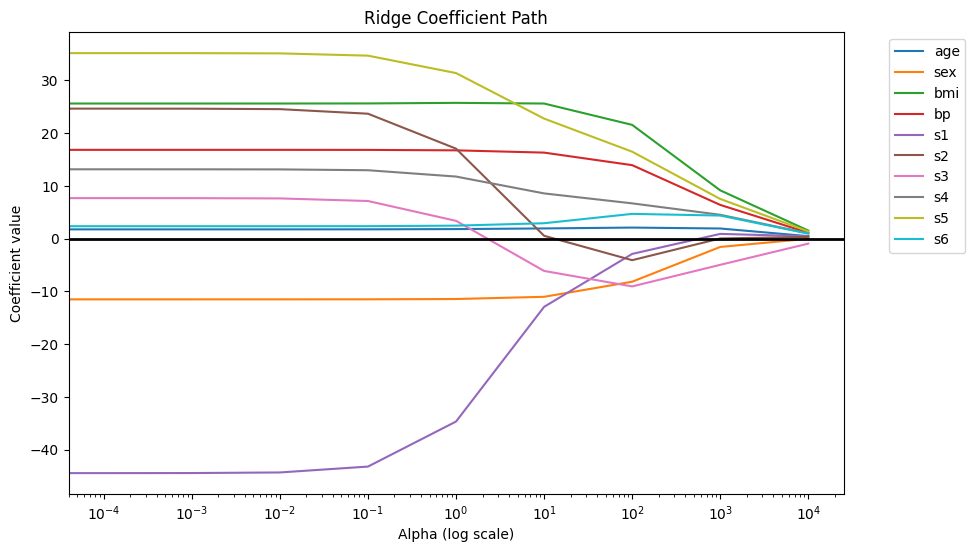

In [17]:
plt.figure(figsize=(10,6))

for column in coef_df.columns:
    plt.plot(coef_df.index, coef_df[column], label=column)

# Add black horizontal line at y = 0
plt.axhline(y=0, color='black', linewidth=2)

plt.xscale('log')
plt.xlabel("Alpha (log scale)")
plt.ylabel("Coefficient value")
plt.title("Ridge Coefficient Path")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

## 3) Bias Variance tradeoff


Ridge Regression helps control the tradeoff between bias and variance.

---

#### What is Bias?

Bias measures how much the model’s predictions differ from the true relationship.

- High Bias → Underfitting
- Low Bias → Flexible model

---

#### What is Variance?

Variance measures how sensitive the model is to small changes in the training data.

- High Variance → Overfitting
- Low Variance → Stable model

---

### How Ridge Affects Bias and Variance

Ridge adds an L2 penalty:

$$
L = \frac{1}{2m}(Xw - y)^T(Xw - y) + \frac{\lambda}{2m} w^T w
$$

When λ increases:

- Coefficients shrink
- Model becomes simpler
- Variance decreases
- Bias increases

---

### Effect of λ on Bias & Variance

| λ Value | Bias | Variance | Model Behavior |
|----------|------|----------|----------------|
| λ = 0 | Low | High | Overfitting risk |
| Small λ | Slightly higher | Slightly lower | Good balance |
| Medium λ | Moderate | Low | Stable model |
| Large λ | High | Very Low | Underfitting |
| Very Large λ | Very High | Very Low | Predicts mean |

---

### Intuition

Without regularization:

- Model tries to fit noise
- Coefficients can become very large
- High variance

With Ridge:

- Large coefficients are penalized
- Model becomes smoother
- Generalization improves

---

### Mathematical Insight

Closed-form Ridge solution:

$$
w = (X^T X + \lambda I)^{-1} X^T y
$$

Adding λI improves the conditioning of the matrix,
which reduces sensitivity to noise.

---

### Key Takeaway

Ridge Regression reduces variance at the cost of introducing some bias.

The goal is to find the λ that minimizes total prediction error.

In [18]:
m = 100
X = 5 * np.random.rand(m, 1) - 2
y = 0.7 * X**2 - 2 * X + 3 + np.random.randn(m, 1)

In [19]:
y = y.ravel() 

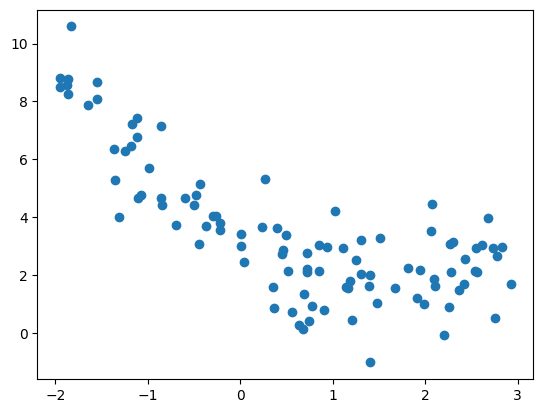

In [20]:
plt.scatter(X, y)
plt.show()

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [22]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=15)

X_train = poly.fit_transform(X_train)
X_test = poly.transform(X_test)

In [23]:
print(X_train.shape)

(80, 16)


In [24]:
print(X.shape)
print(y.shape)

(100, 1)
(100,)


In [25]:
from mlxtend.evaluate import bias_variance_decomp
import numpy as np
import matplotlib.pyplot as plt

In [26]:
pip show mlxtend

Name: mlxtend
Version: 0.24.0
Summary: Machine Learning Library Extensions
Home-page: https://github.com/rasbt/mlxtend
Author: 
Author-email: Sebastian Raschka <mail@sebastianraschka.com>
License: BSD 3-Clause
Location: E:\bhandaara\100daysOfML\lala\MachineLearningJourney_fresh\day55\ml_env\Lib\site-packages
Requires: joblib, matplotlib, numpy, pandas, scikit-learn, scipy
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [36]:
from mlxtend.evaluate import bias_variance_decomp

alphas = np.linspace(0,200,100)

loss = []
bias = []
variance = []

for i in alphas:
    reg = Ridge(alpha=i)
    avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        reg, X_train, y_train, X_test, y_test, 
        loss='mse',
        random_seed=123)
    loss.append(avg_expected_loss)
    bias.append(avg_bias)
    variance.append(avg_var)

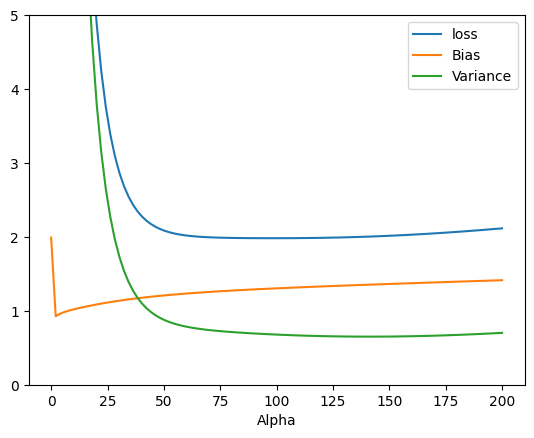

In [38]:
plt.plot(alphas,loss,label='loss')
plt.plot(alphas,bias,label='Bias')
plt.plot(alphas,variance,label='Variance')
plt.ylim(0,5)
plt.xlabel('Alpha')
plt.legend()
plt.show()

## 4) Impact on the loss function 

Ridge Regression modifies the original Linear Regression loss function by adding a penalty term.

---

### Original Linear Regression Loss

$$
L = \frac{1}{2m} (Xw - y)^T (Xw - y)
$$

This minimizes only the training error.

---

### Ridge Regression Loss

$$
L = \frac{1}{2m} (Xw - y)^T (Xw - y)
+
\frac{\lambda}{2m} w^T w
$$

Now the loss has two parts:
>️  Data fitting term  
>  Regularization term  

---

### How Ridge Changes the Loss Landscape

Without regularization:

- Loss surface can be steep and narrow
- If features are correlated → loss valley becomes elongated
- Optimization becomes unstable

With Ridge:

- The term \( \lambda w^T w \) adds curvature
- Makes the loss surface more rounded
- Improves conditioning
- Stabilizes optimization

---

### Mathematical Effect

Gradient becomes:

$$
\frac{\partial L}{\partial w}
=
\frac{1}{m} X^T (Xw - y)
+
\frac{\lambda}{m} w
$$

The additional term:

$$
\frac{\lambda}{m} w
$$

pushes weights toward zero.

---

### What Happens as λ Increases?

- Regularization term dominates
- Weights shrink
- Training loss increases
- Test loss may decrease initially
- Eventually model underfits

---

### Bias–Variance View

Increasing λ:

- Decreases variance
- Increases bias
- Changes total expected loss

There exists an optimal λ that minimizes total error.

---

### Key Insight

Ridge does NOT just shrink coefficients.

It fundamentally reshapes the loss function
by adding a quadratic penalty that stabilizes the solution.

[27.82809103]
-2.29474455867698


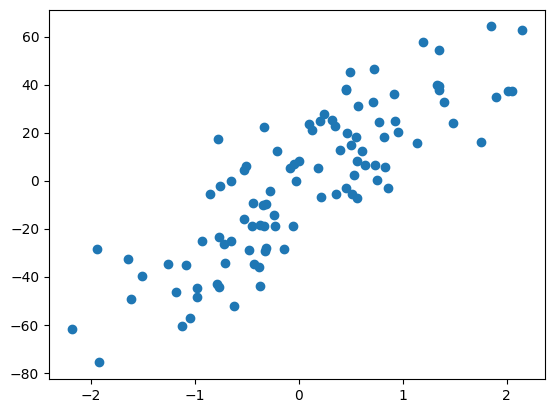

In [44]:
from sklearn.datasets import make_regression

X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)

plt.scatter(X,y)

from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X,y)
print(reg.coef_)
print(reg.intercept_)

In [48]:
intercept = reg.intercept_

def cal_loss(m, alpha):
    return np.sum((y - (m*X.ravel() + intercept))**2) + alpha*m*m

In [49]:
def predict(m):
    return m*X + intercept

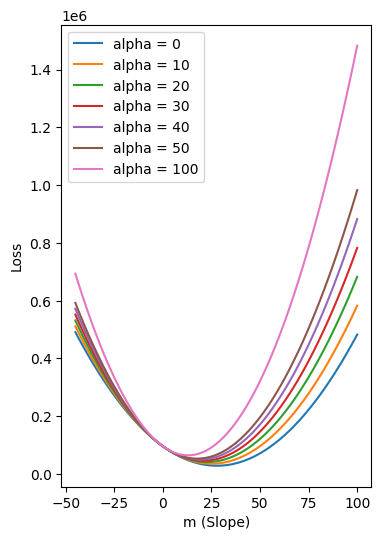

In [51]:
m = np.linspace(-45,100,100)
plt.figure(figsize=(4,6))
for j in [0,10,20,30,40,50,100]:
    loss = []
    for i in range(m.shape[0]):
        loss_i = cal_loss(m[i],j)
        loss.append(loss_i)
    plt.plot(m,loss,label='alpha = {}'.format(j))
plt.legend()
plt.xlabel('m (Slope)')
plt.ylabel('Loss')
plt.show()

In [52]:
# so the loss function is shrinking on incresing alpha 

## 3d 

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_regression

# Generate 1D regression data
X, y = make_regression(
    n_samples=100,
    n_features=1,
    noise=20,
    random_state=13
)

X = X.ravel()

In [71]:
def ridge_loss(w0, w1, alpha):
    y_pred = w0 + w1 * X
    mse = np.sum((y - y_pred)**2)
    ridge_penalty = alpha * w1**2
    return mse + ridge_penalty

In [72]:
w0_vals = np.linspace(-100, 100, 100)
w1_vals = np.linspace(-50, 50, 100)

W0, W1 = np.meshgrid(w0_vals, w1_vals)

In [74]:
alpha = 1000   # no regularization

In [75]:
Loss = ridge_loss(W0, W1, alpha)

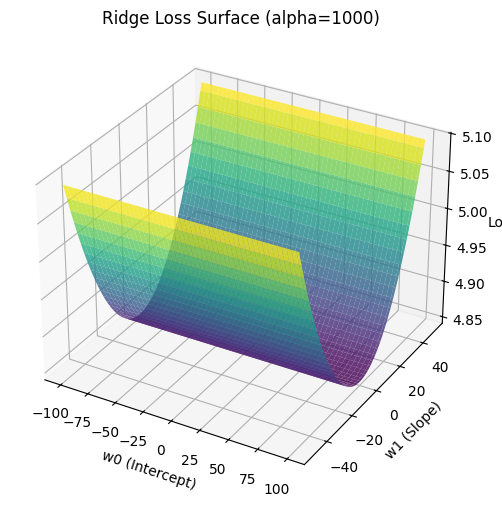

In [76]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(W0, W1, Loss, cmap='viridis', alpha=0.8)

ax.set_xlabel('w0 (Intercept)')
ax.set_ylabel('w1 (Slope)')
ax.set_zlabel('Loss')
ax.set_title(f'Ridge Loss Surface (alpha={alpha})')

plt.show()

## 5) Why callled Ridge

##### hard constraints ridge regression

The name **Ridge Regression** comes from the shape of the loss surface in linear regression when features are highly correlated.

---

### 1) The Problem Without Regularization

Ordinary Least Squares minimizes:

$$
L = (Xw - y)^T (Xw - y)
$$

When features are highly correlated:

- The loss surface becomes very flat in one direction
- It forms a long narrow valley
- This valley looks like a **ridge**

This makes the solution unstable because many combinations of weights give similar loss.

---

### 2)  Why Is That a Problem?

- Small changes in data cause large changes in coefficients
- The matrix \(X^TX\) becomes nearly singular
- Optimization becomes unstable
- Model variance becomes high

This phenomenon is called **multicollinearity**.

---

### 3)  How Ridge Fixes This

Ridge adds an L2 penalty:

$$
L = (Xw - y)^T (Xw - y) + \lambda w^T w
$$

This adds curvature to the loss function and makes the valley more rounded.

Mathematically, the solution becomes:

$$
w = (X^TX + \lambda I)^{-1} X^T y
$$

Since \( \lambda I \) is added:

- The matrix is always invertible
- Numerical stability improves
- The long flat ridge disappears

---

### 4)  Geometric Interpretation

Ridge imposes the constraint:

$$
\|w\|^2 \leq t
$$

This forms a circular (L2) constraint region.

The solution is found where:

- Elliptical loss contours
- Touch the circular constraint boundary

This prevents movement along unstable ridge directions.

---

### 5) Historical Origin

The term "Ridge Regression" was introduced by:

**Hoerl and Kennard (1970)**

It was named after the ridge-like shape of the least squares loss surface in the presence of multicollinearity.

---

### 🔥 One-Line Summary

Ridge Regression is called “Ridge” because it addresses the ridge-shaped flat regions in the least squares loss surface caused by correlated features.

# TIP

##### use ridge regression when there are more than 2 input columns